In [20]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import cmocean
%matplotlib inline

In [21]:
# compare 3/6/16 PAR
f2=nc.Dataset('/data/eolson/MEOPAR/SS36runs/CedarRuns/par16_A2/SalishSea_1h_20160225_20160414_ptrc_T_20160306-20160315.nc')
fn=nc.Dataset('/data/eolson/MEOPAR/SS36runs/linkHC201812/06mar16/SalishSea_1h_20160306_20160306_carp_T.nc')

In [22]:
f2.variables.keys()

odict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'nitrate', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ammonium', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'dissolved_organic_nitrogen', 'particulate_organic_nitrogen', 'biogenic_silicon', 'mesozooplankton', 'e3t', 'PAR'])

In [23]:
fn.variables.keys()

odict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'PAR', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'sigma_theta', 'e3t', 'dissolved_inorganic_carbon', 'total_alkalinity', 'dissolved_oxygen'])

In [24]:
par2=np.mean(np.copy(f2.variables['PAR'][0:24,:,:,:]),0)
parn=np.mean(np.copy(fn.variables['PAR'][0:24,:,:,:]),0)

In [25]:
thalweg_file='/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'

In [26]:
thalweg_pts = np.loadtxt(thalweg_file, delimiter=' ', dtype=int)

In [27]:
par2th=par2[:,thalweg_pts[:,0],thalweg_pts[:,1]]

In [28]:
parnth=parn[:,thalweg_pts[:,0],thalweg_pts[:,1]]

/home/eolson/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in true_divide
/home/eolson/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide


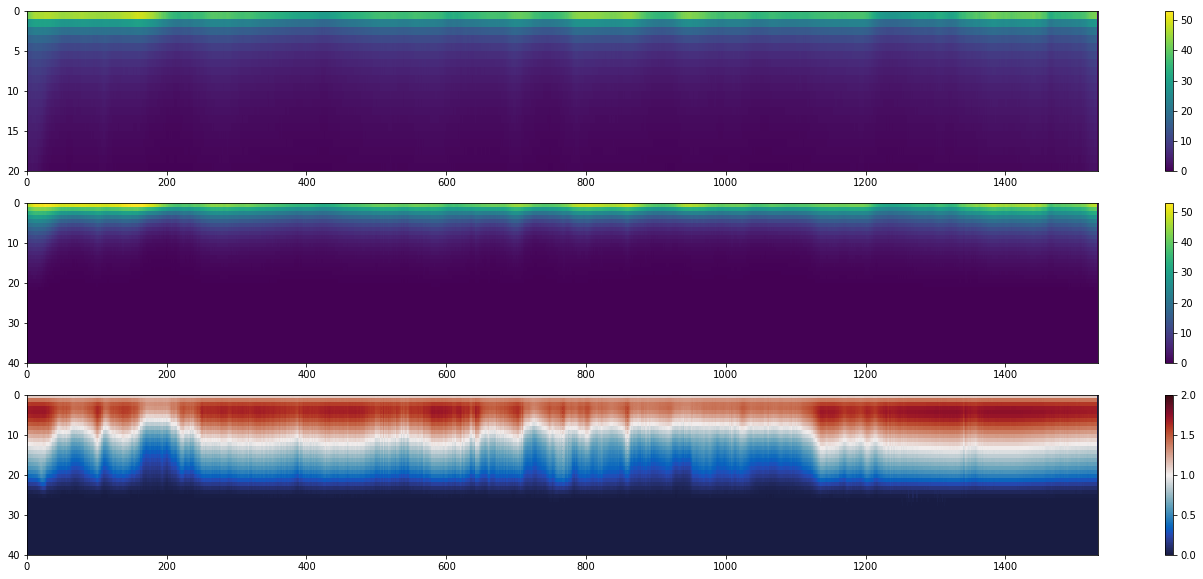

In [37]:
fig,ax=plt.subplots(3,1,figsize=(24,10))
m0=ax[0].pcolormesh(parnth,vmin=0,vmax=53)
fig.colorbar(m0,ax=ax[0])
ax[0].set_ylim(20,0);

m1=ax[1].pcolormesh(par2th,vmin=0,vmax=53)
fig.colorbar(m1,ax=ax[1])
ax[1].set_ylim(40,0);

m2=ax[2].pcolormesh(np.where(parnth>0,par2th/parnth,0.0),vmin=0,vmax=2,cmap=cmocean.cm.balance)
fig.colorbar(m2,ax=ax[2])
ax[2].set_ylim(40,0);

(40, 0)

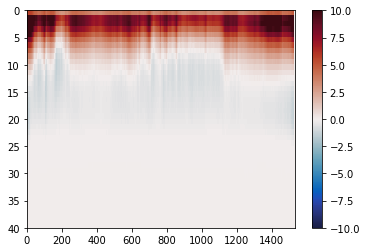

In [39]:
plt.pcolormesh(par2th-parnth,vmin=-10,vmax=10,cmap=cmocean.cm.balance)
plt.colorbar()
plt.ylim(40,0)

In [31]:
np.mean(par2th-1.3*parnth)

-0.11433972

In [32]:
np.shape(par2th)

(40, 1533)

In [33]:
np.mean(par2th[:,800:900],1)/np.mean(parnth[:,800:900],1)

/home/eolson/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


array([1.09144926e+00, 1.30786788e+00, 1.41737366e+00, 1.43366957e+00,
       1.38400435e+00, 1.29561806e+00, 1.18912184e+00, 1.07821143e+00,
       9.71087158e-01, 8.72251451e-01, 7.84004092e-01, 7.06534028e-01,
       6.38601184e-01, 5.78915060e-01, 5.26354969e-01, 4.79305238e-01,
       4.35647339e-01, 3.93901497e-01, 3.53087068e-01, 3.11183244e-01,
       2.64889508e-01, 2.11835474e-01, 1.53407067e-01, 9.57293659e-02,
       4.74006087e-02, 1.68575533e-02, 4.25907737e-03, 7.75509456e-04,
       1.07756590e-04, 1.21821095e-05, 1.17188233e-06, 9.86370097e-08,
       7.24406757e-09, 4.73524886e-10, 2.80532056e-11, 1.50937943e-12,
       7.15700828e-14, 2.64825931e-15, 6.91714170e-17,            nan],
      dtype=float32)

/home/eolson/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


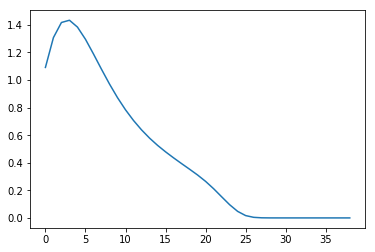

In [34]:
plt.plot(np.mean(par2th[:,800:900],1)/np.mean(parnth[:,800:900],1))

In [35]:
z=f2.variables['deptht'][:]

In [36]:
zs=np.arange(0.25,40,.5)
np.interp(zs,z,np.mean(par2th[:,800:900],1)/np.mean(parnth[:,800:900],1))

/home/eolson/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


array([1.09144926, 1.1455537 , 1.25376271, 1.33524376, 1.38999619,
       1.42144737, 1.42959517, 1.42125528, 1.39642367, 1.36191579,
       1.31772618, 1.2690143 , 1.2157747 , 1.16143733, 1.10599946,
       1.05151348, 0.99798415, 0.94652978, 0.897171  , 0.85045515,
       0.80643415, 0.76509174, 0.72653201, 0.6903269 , 0.6566586 ,
       0.62499853, 0.59566139, 0.56800262, 0.54257615, 0.51836023,
       0.49627749, 0.47482231, 0.45545126, 0.43608021, 0.41926925,
       0.40251679, 0.38717964, 0.37334095, 0.35950226, 0.34719708,
       0.33621711, 0.32523713, 0.31425716, 0.30503378, 0.29649338,
       0.28795297, 0.27941257, 0.27087216, 0.26296574, 0.2565422 ,
       0.25011866, 0.24369513, 0.23727159, 0.23084806, 0.22442452,
       0.21800098, 0.2116537 , 0.20712846, 0.20260323, 0.19807799,
       0.19355276, 0.18902752, 0.18450229, 0.17997705, 0.17545181,
       0.17092658, 0.16640134, 0.16187611, 0.15735087, 0.15303019,
       0.15009702, 0.14716385, 0.14423068, 0.1412975 , 0.13836